# **0. Bibliotecas**

In [1]:
!pip install pandas-profiling==2.7.1

In [60]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# **1. Datasets**

In [3]:
order_items_df = pd.read_csv(r'C:\Users\g_fma\OneDrive\Área de Trabalho\DOCS\data_projects\projects_git\dnc_ecommerce\data\.csv\DNC_order_items_dataset.csv',index_col='Unnamed: 0')
order_reviews_df = pd.read_csv(r'C:\Users\g_fma\OneDrive\Área de Trabalho\DOCS\data_projects\projects_git\dnc_ecommerce\data\.csv\DNC_order_reviews_dataset.csv',index_col='Unnamed: 0')
orders_df = pd.read_csv(r'C:\Users\g_fma\OneDrive\Área de Trabalho\DOCS\data_projects\projects_git\dnc_ecommerce\data\.csv\DNC_orders_dataset.csv',index_col='Unnamed: 0')
products_items_df = pd.read_csv(r'C:\Users\g_fma\OneDrive\Área de Trabalho\DOCS\data_projects\projects_git\dnc_ecommerce\data\.csv\DNC_products_dataset.csv',index_col='Unnamed: 0')

## 1.1 Visualização dos Dataframes

In [4]:
order_items_df.head()


,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [5]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ MB


In [6]:
order_reviews_df.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [7]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [8]:
orders_df.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [9]:
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99441 non-null  object
 1   customer_id   99441 non-null  object
 2   order_status  99441 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [11]:
products_items_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0


In [12]:
products_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.3+ MB


## 1.2 Merge dos Dataframes

In [13]:
df_merge1 = order_items_df.merge(orders_df,how='left',on='order_id')
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   customer_id    112650 non-null  object 
 5   order_status   112650 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
df_merge1.head()

,order_id,order_item_id,product_id,price,customer_id,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a,delivered
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered


In [15]:
df_merge2 = df_merge1.merge(order_reviews_df,how='left',on='order_id')
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       113314 non-null  object 
 1   order_item_id  113314 non-null  int64  
 2   product_id     113314 non-null  object 
 3   price          113314 non-null  float64
 4   customer_id    113314 non-null  object 
 5   order_status   113314 non-null  object 
 6   review_id      112372 non-null  object 
 7   review_score   112372 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 7.8+ MB


In [16]:
df_merge2.head()

,order_id,order_item_id,product_id,price,customer_id,order_status,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a,delivered,97ca439bc427b48bc1cd7177abe71365,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,7b07bacd811c4117b742569b04ce3580,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,0c5b33dea94867d1ac402749e5438e8b,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,f4028d019cb58564807486a6aaf33817,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,940144190dcba6351888cafa43f3a3a5,5.0


In [17]:
df = df_merge2.merge(products_items_df,how='left',on='product_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    113314 non-null  object 
 1   order_item_id               113314 non-null  int64  
 2   product_id                  113314 non-null  object 
 3   price                       113314 non-null  float64
 4   customer_id                 113314 non-null  object 
 5   order_status                113314 non-null  object 
 6   review_id                   112372 non-null  object 
 7   review_score                112372 non-null  float64
 8   product_category_name       111702 non-null  object 
 9   product_name_lenght         111702 non-null  float64
 10  product_description_lenght  111702 non-null  float64
 11  product_weight_g            113296 non-null  float64
 12  product_length_cm           113296 non-null  float64
 13  product_height

In [18]:
df.head()

,order_id,order_item_id,product_id,price,customer_id,order_status,review_id,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a,delivered,97ca439bc427b48bc1cd7177abe71365,5.0,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,7b07bacd811c4117b742569b04ce3580,4.0,pet_shop,56.0,239.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,0c5b33dea94867d1ac402749e5438e8b,5.0,moveis_decoracao,59.0,695.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,f4028d019cb58564807486a6aaf33817,4.0,perfumaria,42.0,480.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,940144190dcba6351888cafa43f3a3a5,5.0,ferramentas_jardim,59.0,409.0,3750.0,35.0,40.0,30.0


# **2. Análise Exploratória**

In [19]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset: 24it [00:01, 23.25it/s, Completed]
Render HTML: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


In [20]:
df['product_category_name'].value_counts()

cama_mesa_banho                  11270
beleza_saude                      9727
esporte_lazer                     8700
moveis_decoracao                  8415
informatica_acessorios            7894
                                 ...  
la_cuisine                          14
cds_dvds_musicais                   14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

## 2.1 Limpeza dos Dados

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    113314 non-null  object 
 1   order_item_id               113314 non-null  int64  
 2   product_id                  113314 non-null  object 
 3   price                       113314 non-null  float64
 4   customer_id                 113314 non-null  object 
 5   order_status                113314 non-null  object 
 6   review_id                   112372 non-null  object 
 7   review_score                112372 non-null  float64
 8   product_category_name       111702 non-null  object 
 9   product_name_lenght         111702 non-null  float64
 10  product_description_lenght  111702 non-null  float64
 11  product_weight_g            113296 non-null  float64
 12  product_length_cm           113296 non-null  float64
 13  product_height

### 2.2.1 Remoção de Colunas IDS

In [22]:
df = df.drop(columns=['order_id','review_id'])

### 2.2.2 Dados Nulos

* Serão Excluídos (Representatividade inferior a 2% dos dados)
    * product_category_name
    * product_name_lenght
    * product_description_lenght
    * product_weight_g
    * product_length_cm
    * product_height_cm
    * product_width_cm
    * review_score

In [23]:
pd.DataFrame(df.isnull().sum(axis=0)).sort_values(by=0,ascending=False)/df.shape[0]*100

,0
product_category_name,1.422596
product_name_lenght,1.422596
product_description_lenght,1.422596
review_score,0.831318
product_weight_g,0.015885
product_length_cm,0.015885
product_height_cm,0.015885
product_width_cm,0.015885
order_item_id,0.000000
product_id,0.000000


In [24]:
df_null_index = df[df['product_category_name'].isnull()].index
df = df.drop(df_null_index)
df_null_index = df[df['product_weight_g'].isnull()].index
df = df.drop(df_null_index)
df_null_index = df[df['review_score'].isnull()].index
df = df.drop(df_null_index)

In [25]:
df.head()

,order_item_id,product_id,price,customer_id,order_status,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a,delivered,5.0,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
1,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,4.0,pet_shop,56.0,239.0,30000.0,50.0,30.0,40.0
2,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,5.0,moveis_decoracao,59.0,695.0,3050.0,33.0,13.0,33.0
3,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,4.0,perfumaria,42.0,480.0,200.0,16.0,10.0,15.0
4,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,5.0,ferramentas_jardim,59.0,409.0,3750.0,35.0,40.0,30.0


### 2.2.3 Tratamento de Outliers

* price
* product_weight_g

In [26]:
df.describe(percentiles=[0.99,0.90,0.75,0.5,0.25,0.10,0.01]).transpose()

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
order_item_id,110773.0,1.196384,0.692829,1.00,1.00,1.0,1.0,1.0,1.0,2.0,4.0,21.0
price,110773.0,120.482999,181.828589,0.85,9.99,23.9,39.9,74.9,134.9,229.9,889.0,6735.0
review_score,110773.0,4.035225,1.385420,1.00,1.00,1.0,4.0,5.0,5.0,5.0,5.0,5.0
product_name_lenght,110773.0,48.777482,10.025168,5.00,21.00,33.0,42.0,52.0,57.0,59.0,63.0,76.0
product_description_lenght,110773.0,786.793226,651.612397,4.00,86.00,215.0,348.0,601.0,985.0,1586.0,3395.0,3992.0
product_weight_g,110773.0,2096.779143,3751.465382,0.00,75.00,150.0,300.0,700.0,1800.0,6250.0,18225.0,40425.0
product_length_cm,110773.0,30.209166,16.174395,7.00,16.00,16.0,18.0,25.0,38.0,51.0,95.0,105.0
product_height_cm,110773.0,16.609147,13.461482,2.00,2.00,4.0,8.0,13.0,20.0,31.0,65.0,105.0
product_width_cm,110773.0,23.046491,11.716425,6.00,11.00,12.0,15.0,20.0,30.0,40.0,62.0,118.0


In [27]:
#from scipy import stats
#z=np.abs(stats.zscore(df['price']))
#print(z)

In [28]:
#df = df[z<3]
#df.shape

## 2.2 Principais Análises

In [29]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset: 23it [00:00, 34.95it/s, Completed]
Render HTML: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


In [30]:
df.describe(percentiles=[0.99,0.90,0.75,0.5,0.25,0.10,0.01]).transpose()

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
order_item_id,110773.0,1.196384,0.692829,1.00,1.00,1.0,1.0,1.0,1.0,2.0,4.0,21.0
price,110773.0,120.482999,181.828589,0.85,9.99,23.9,39.9,74.9,134.9,229.9,889.0,6735.0
review_score,110773.0,4.035225,1.385420,1.00,1.00,1.0,4.0,5.0,5.0,5.0,5.0,5.0
product_name_lenght,110773.0,48.777482,10.025168,5.00,21.00,33.0,42.0,52.0,57.0,59.0,63.0,76.0
product_description_lenght,110773.0,786.793226,651.612397,4.00,86.00,215.0,348.0,601.0,985.0,1586.0,3395.0,3992.0
product_weight_g,110773.0,2096.779143,3751.465382,0.00,75.00,150.0,300.0,700.0,1800.0,6250.0,18225.0,40425.0
product_length_cm,110773.0,30.209166,16.174395,7.00,16.00,16.0,18.0,25.0,38.0,51.0,95.0,105.0
product_height_cm,110773.0,16.609147,13.461482,2.00,2.00,4.0,8.0,13.0,20.0,31.0,65.0,105.0
product_width_cm,110773.0,23.046491,11.716425,6.00,11.00,12.0,15.0,20.0,30.0,40.0,62.0,118.0


<AxesSubplot:>

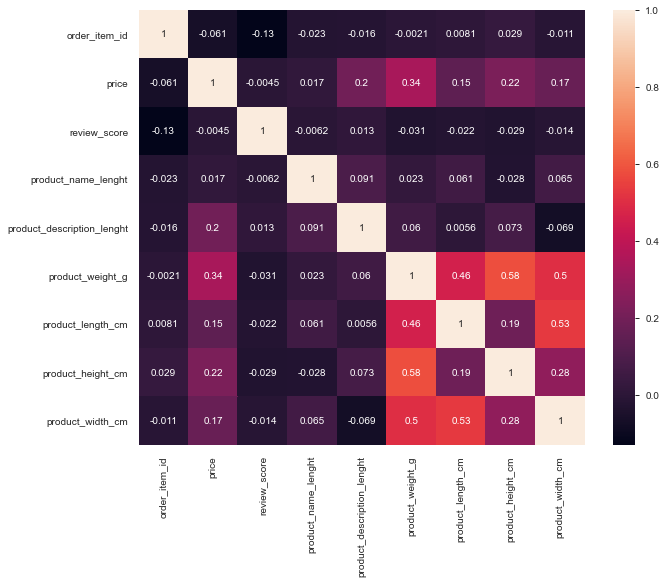

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# **3. Feature Engineering**

## 3.1 Seleção de Variáveis

* order_status - Não agrega para a análise

In [32]:
df = df.drop(columns=['order_status'])

## 3.2 Construção de Variáveis

* Média geral de avaliação do produto
* Volume do produto
* Quantidade de vendas por avaliação geral do produto

In [33]:
df.head(2)

,order_item_id,product_id,price,customer_id,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1,4244733e06e7ecb4970a6e2683c13e61,58.9,3ce436f183e68e07877b285a838db11a,5.0,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
1,1,e5f2d52b802189ee658865ca93d83a8f,239.9,f6dd3ec061db4e3987629fe6b26e5cce,4.0,pet_shop,56.0,239.0,30000.0,50.0,30.0,40.0


In [34]:
df_agg_product_review = df.groupby(by='product_id')\
    .agg({'review_score':np.mean})\
    .rename(columns={'review_score':'review_score_mean'})
df = df.merge(df_agg_product_review,how='left',on='product_id')

In [35]:
df['product_volume_cm3'] = df.apply(lambda x: x['product_length_cm']*x['product_height_cm']*x['product_width_cm'], axis=1)

In [36]:
df_agg_product_count = df.groupby(by='product_id')\
    .agg({'customer_id':'count'})\
    .rename(columns={'customer_id':'count_sales'})
df = df.merge(df_agg_product_count,how='left',on='product_id')

In [37]:
df['recommender_rate'] = df.apply(lambda x: 1/(x['review_score_mean']/x['count_sales']), axis=1)

In [48]:
df.head(10)

,order_item_id,product_id,price,customer_id,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score_mean,product_volume_cm3,count_sales,recommender_rate
0,1,4244733e06e7ecb4970a6e2683c13e61,58.90,3ce436f183e68e07877b285a838db11a,5.0,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,4.444444,3528.0,9,2.025000
1,1,e5f2d52b802189ee658865ca93d83a8f,239.90,f6dd3ec061db4e3987629fe6b26e5cce,4.0,pet_shop,56.0,239.0,30000.0,50.0,30.0,40.0,4.000000,60000.0,1,0.250000
2,1,c777355d18b72b67abbeef9df44fd0fd,199.00,6489ae5e4333f3693df5ad4372dab6d3,5.0,moveis_decoracao,59.0,695.0,3050.0,33.0,13.0,33.0,4.333333,14157.0,3,0.692308
3,1,7634da152a4610f1595efa32f14722fc,12.99,d4eb9395c8c0431ee92fce09860c5a06,4.0,perfumaria,42.0,480.0,200.0,16.0,10.0,15.0,4.000000,2400.0,2,0.500000
4,1,ac6c3623068f30de03045865e4e10089,199.90,58dbd0b2d70206bf40e62cd34e84d795,5.0,ferramentas_jardim,59.0,409.0,3750.0,35.0,40.0,30.0,3.833333,42000.0,12,3.130435
5,1,ef92defde845ab8450f9d70c526ef70f,21.90,816cbea969fe5b689b39cfc97a506742,4.0,utilidades_domesticas,36.0,558.0,450.0,24.0,8.0,15.0,4.000000,2880.0,5,1.250000
6,1,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,32e2e6ab09e778d99bf2e0ecd4898718,4.0,telefonia,52.0,815.0,200.0,27.0,5.0,20.0,4.333333,2700.0,3,0.692308
7,1,557d850972a7d6f792fd18ae1400d9b6,810.00,9ed5e522dd9dd85b4af4a077526d8117,5.0,ferramentas_jardim,39.0,1310.0,13805.0,35.0,75.0,45.0,5.000000,118125.0,1,0.200000
8,1,310ae3c140ff94b03219ad0adc3c778f,145.95,16150771dfd4776261284213b89c304e,1.0,beleza_saude,59.0,493.0,2000.0,30.0,12.0,16.0,3.000000,5760.0,2,0.666667
9,1,4535b0e1091c278dfd193e5a1d63b39f,53.99,351d3cb2cee3c7fd0af6616c82df21d3,4.0,livros_tecnicos,52.0,1192.0,850.0,29.0,3.0,21.0,4.333333,1827.0,3,0.692308


# **4. Modelagem**

## 4.1 Recomendação por Filtro Simples

* Filtro de produtos mais vendidos, avaliando também sua avaliação média

In [49]:
df_recommender_FC = df.groupby(by='product_id').agg({'recommender_rate':'first'}).sort_values('recommender_rate',ascending=False)
df_recommender_FC.head()

,recommender_rate
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,130.377968
99a4788cb24856965c36a24e339b6058,123.642363
422879e10f46682990de24d770e7f83d,123.147028
368c6c730842d78016ad823897a372db,98.911958
53759a2ecddad2bb87a079a1f1519f73,96.416493


In [57]:
top_products = df_recommender_FC.head(1000).index.tolist()
top_products[:10]

['aca2eb7d00ea1a7b8ebd4e68314663af',
 '99a4788cb24856965c36a24e339b6058',
 '422879e10f46682990de24d770e7f83d',
 '368c6c730842d78016ad823897a372db',
 '53759a2ecddad2bb87a079a1f1519f73',
 '389d119b48cf3043d311335e499d9c6b',
 'd1c427060a0f73f6b889a5c7c61f2ac4',
 '53b36df67ebb7c41585e8d54d6772e08',
 '154e7e31ebfa092203795c972e5804a6',
 '2b4609f8948be18874494203496bc318']

## 4.2 Recomendação por Filtro Colaborativo

* Construção da matriz de similaridade com base nas compras de outros clientes.

In [58]:
matriz_de_relacioamento_top_products = df[df['product_id'].isin(top_products)]\
  .pivot_table(index='product_id', columns='customer_id', values='review_score').fillna(0)
matriz_de_relacioamento_top_products.shape

(1000, 33281)

In [68]:
cos_products = cosine_similarity(matriz_de_relacioamento_top_products)

print(cos_products)
cos_products.shape

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


(1000, 1000)

In [62]:
def recomendar(id_produto):
  print(f"Produto: {id_produto}")
  try:
    product_idx = matriz_de_relacioamento_top_products.index.tolist().index(id_produto)
    closest_10_products = np.argsort(-cos_products[product_idx])[1:11]
    print(f"Retornando 10 produtos mais próximos de: {id_produto}.")
    return matriz_de_relacioamento_top_products.index[closest_10_products].tolist()
  except ValueError as e:
    print(f"{id_produto}, não está incluso na matriz de recomendação. Retornando os 10 mais avaliados")
    return top_products[:10]

In [65]:
id_produto = "id_novo"
ids_10_mais_proximos = recomendar(id_produto)

ids_10_mais_proximos

Produto: id_novo
id_novo, não está incluso na matriz de recomendação. Retornando os 10 mais avaliados


['aca2eb7d00ea1a7b8ebd4e68314663af',
 '99a4788cb24856965c36a24e339b6058',
 '422879e10f46682990de24d770e7f83d',
 '368c6c730842d78016ad823897a372db',
 '53759a2ecddad2bb87a079a1f1519f73',
 '389d119b48cf3043d311335e499d9c6b',
 'd1c427060a0f73f6b889a5c7c61f2ac4',
 '53b36df67ebb7c41585e8d54d6772e08',
 '154e7e31ebfa092203795c972e5804a6',
 '2b4609f8948be18874494203496bc318']

In [64]:
id_produto = 'aca2eb7d00ea1a7b8ebd4e68314663af'
ids_10_mais_proximos = recomendar(id_produto)

ids_10_mais_proximos

Produto: aca2eb7d00ea1a7b8ebd4e68314663af
Retornando 10 produtos mais próximos de: aca2eb7d00ea1a7b8ebd4e68314663af.


['28b4eced95a52d9c437a4caf9d311b95',
 'a8075470f960215ffb67624782f80fec',
 'a8115d34a4b7b74388da609692162c37',
 'a869ec6209c361ca46dad85a5530e119',
 'a8b0dd2c57b49b649373ff5a495a697e',
 'a8fd2715c837d04bac16cf90155919f8',
 'a8fe47ad6f852f93cc92c7b408687de3',
 'a92930c327948861c015c919a0bcb4a8',
 'a9516a079e37a9c9c36b9b78b10169e8',
 'a9f480bfc49f0b85e8394e1cdf685b4e']

# **5. Resultados**